In [1]:
import cvxpy as cp
import numpy as np
import dccp
import numpy.typing as npt
from enum import Enum
from multireward_ope.tabular.mdp import MDP
from multireward_ope.tabular.characteristic_time import CharacteristicTimeSolver
from multireward_ope.tabular.reward_set import RewardSetCircle, \
    RewardSetRewardFree, RewardSetPolytope
from typing import NamedTuple


mdp = MDP.generate_random_mdp(3, 2)
policy = np.array([0, 1, 0], dtype=np.long)
rewards = RewardSetCircle(mdp.dim_state, mdp.dim_action,
    RewardSetCircle.RewardSetCircleConfig(center=np.zeros(mdp.dim_state), radius=1, p=2))
rbox = RewardSetPolytope.from_box(mdp.dim_state, mdp.dim_action,
         a=np.zeros(mdp.dim_state), b=np.ones(mdp.dim_state))
rfree = RewardSetRewardFree(mdp.dim_state, mdp.dim_action, RewardSetRewardFree.RewardSetFreeConfig())
solver = CharacteristicTimeSolver(mdp.dim_state, mdp.dim_action, solver=cp.GUROBI)
solver.build_problem(rewards)

print(solver.solve(0.9, mdp, policy))

solver.build_problem(rfree)
print(solver.solve(0.9, mdp, policy))

solver.build_problem(rbox)
print(solver.solve(0.9, mdp, policy))
        


Restricted license - for non-production use only - expires 2026-11-23


/project/onlinepe/multi-reward-ope/.venv/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:245: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


BoundResult(value=2.4796944618085064, w=array([[2.45953052e-01, 1.53286853e-09],
       [3.48853723e-09, 3.65461012e-01],
       [2.81815681e-01, 1.06770250e-01]]))
BoundResult(value=2.4796944618085064, w=array([[2.45953052e-01, 1.53286853e-09],
       [3.48853723e-09, 3.65461012e-01],
       [2.81815681e-01, 1.06770250e-01]]))
BoundResult(value=2.4796944618594794, w=array([[2.45953052e-01, 1.53286854e-09],
       [3.48853731e-09, 3.65461012e-01],
       [2.81815681e-01, 1.06770250e-01]]))


/project/onlinepe/multi-reward-ope/.venv/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:245: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


Text(0, 0.5, 'Characteristic time $T^\\star$')

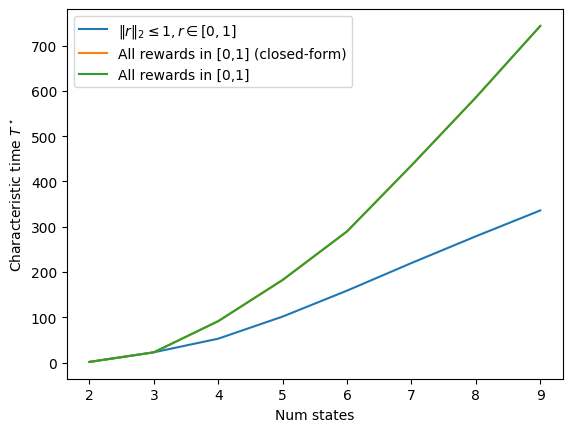

In [2]:
from multireward_ope.tabular.envs.riverswim import RiverSwim, RiverSwimParameters
from multireward_ope.tabular.policy import Policy, PolicyFactory
import matplotlib.pyplot as plt


results_circle = []
results_rfree = []
results_box = []
np.random.seed(0)
for s in range(2, 10):
    mdp = RiverSwim(RiverSwimParameters(s))
    policy = PolicyFactory.from_sequence(np.ones(mdp.dim_state, dtype=np.long))
    rewards = RewardSetCircle(mdp.dim_state, mdp.dim_action,
        RewardSetCircle.RewardSetCircleConfig(np.zeros(mdp.dim_state), radius=1, p=2))
    rbox = RewardSetPolytope.from_box(mdp.dim_state, mdp.dim_action,
         a=np.zeros(mdp.dim_state), b=np.ones(mdp.dim_state))
    rfree = RewardSetRewardFree(mdp.dim_state, mdp.dim_action, RewardSetRewardFree.RewardSetFreeConfig())
    solver = CharacteristicTimeSolver(mdp.dim_state, mdp.dim_action,solver=cp.GUROBI)
    solver.build_problem(rewards)
    results_circle.append(solver.solve(0.9, mdp, policy).value)

    solver.build_problem(rfree)
    solution = solver.solve(0.9, mdp, policy)
    # print(solution.w / solution.w.sum(-1, keepdims=True))
    results_rfree.append(solution.value)

    solver.build_problem(rbox)
    results_box.append(solver.solve(0.9, mdp, policy).value)
plt.plot(range(2,10), results_circle, label='$\|r\|_2 \leq 1, r\in [0,1]$')
plt.plot(range(2,10), results_rfree, label='All rewards in [0,1] (closed-form)')
plt.plot(range(2,10), results_box, label='All rewards in [0,1]')
plt.legend()
plt.xlabel('Num states')
plt.ylabel('Characteristic time $T^\star$')

/project/onlinepe/multi-reward-ope/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


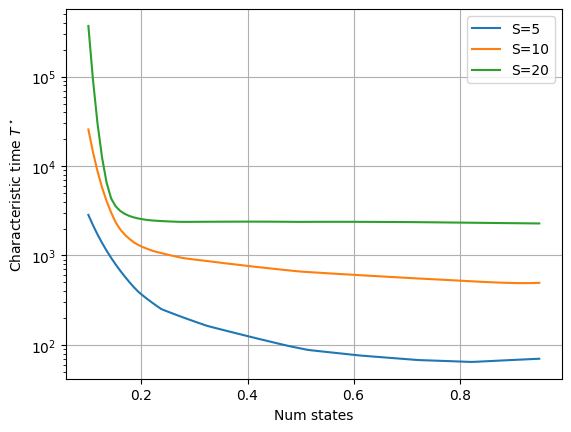

In [ ]:
from multireward_ope.tabular.envs.riverswim import RiverSwim, RiverSwimParameters
from multireward_ope.tabular.envs.env import make_env, DoubleChainParameters, EnvType

from multireward_ope.tabular.policy import Policy, PolicyFactory
import matplotlib.pyplot as plt


np.random.seed(0)

p_values= np.linspace(0.1, 0.95, 100)
s_values = [5, 10, 20]
results = {s: [] for s in s_values}


for p in p_values:
    for s in s_values:
        mdp = RiverSwim(RiverSwimParameters(s, p))
        policy = PolicyFactory.from_sequence(np.ones(mdp.dim_state, dtype=np.long))
        rfree = RewardSetRewardFree(mdp.dim_state, mdp.dim_action, RewardSetRewardFree.RewardSetFreeConfig())
        solver = CharacteristicTimeSolver(mdp.dim_state, mdp.dim_action,solver=cp.GUROBI)

        solver.build_problem(rfree)
        solution = solver.solve(0.9, mdp, policy)
        results[s].append(solution.value)

for s in s_values:
    plt.plot(p_values, results[s], label=f'S={s}')
plt.legend()
plt.xlabel('Num states')
plt.ylabel('Characteristic time $T^\star$')
plt.yscale('log')
plt.grid()

/project/onlinepe/multi-reward-ope/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


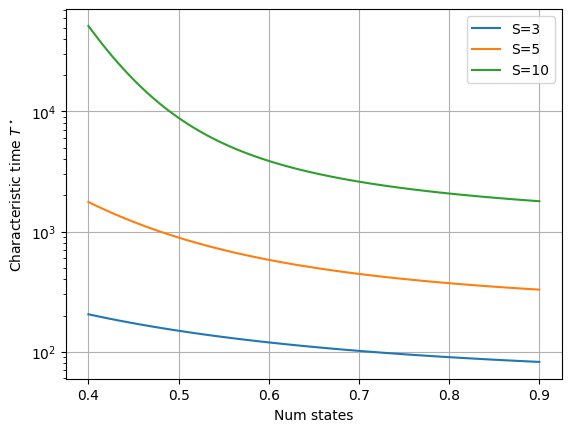

In [8]:
from multireward_ope.tabular.envs.riverswim import RiverSwim, RiverSwimParameters
from multireward_ope.tabular.envs.env import make_env, EnvParameters, DoubleChainParameters, EnvType

from multireward_ope.tabular.policy import Policy, PolicyFactory
import matplotlib.pyplot as plt


np.random.seed(0)

p_values= np.linspace(0.4, 0.9, 100)
s_values = [3, 5,10]
results = {s: [] for s in s_values}


for p in p_values:
    for s in s_values:
        params = EnvParameters(EnvType.DOUBLE_CHAIN, DoubleChainParameters(s, p))
        mdp = make_env(params)
        policy = PolicyFactory.from_sequence(np.ones(mdp.dim_state, dtype=np.long))
        rfree = RewardSetRewardFree(mdp.dim_state, mdp.dim_action, RewardSetRewardFree.RewardSetFreeConfig())
        solver = CharacteristicTimeSolver(mdp.dim_state, mdp.dim_action,solver=cp.GUROBI)

        solver.build_problem(rfree)
        solution = solver.solve(0.9, mdp, policy)
        results[s].append(solution.value)

for s in s_values:
    plt.plot(p_values, results[s], label=f'S={s}')
plt.legend()
plt.xlabel('Num states')
plt.ylabel('Characteristic time $T^\star$')
plt.yscale('log')
plt.grid()